In [34]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Imputer

dataframe = read_csv('mast.csv', engine='python')
dataframe.head()

,Date/Time,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean
0,01-10-2013 10:00,5.62,0.43,5.71,0.43,5.61,0.43,27.81,1004.2
1,01-10-2013 10:10,5.72,0.48,5.85,0.50,5.85,0.43,27.82,1004.1
2,01-10-2013 10:20,6.00,0.36,6.05,0.46,6.05,0.37,27.76,1003.9
3,01-10-2013 10:30,6.49,0.41,6.58,0.53,6.46,0.43,27.77,1003.9
4,01-10-2013 10:40,6.74,0.45,6.82,0.56,6.86,0.39,27.80,1003.8


In [80]:
col = dataframe.columns
col

Index(['Date/Time', 'WS_50_mean', 'WS_50_stdev', 'WS_80_mean', 'WS_80_stdev',
       'WS_100_mean', 'WS_100_stdev', 'Ta_10_mean', 'Pbaro_5_mean'],
      dtype='object')

In [99]:
df1 = dataframe[['Date/Time','WS_50_mean']].copy()
df1['Date/Time']= pd.to_datetime(df1['Date/Time'])
df1.set_index('Date/Time', inplace=True)
df=df1.resample('H').mean()
df.reset_index()
df.head()

,WS_50_mean
Date/Time,
2013-01-10 10:00:00,6.286667
2013-01-10 11:00:00,7.603333
2013-01-10 12:00:00,8.895000
2013-01-10 13:00:00,10.348333
2013-01-10 14:00:00,11.605000


In [100]:
from fbprophet import Prophet

dataset=df.reset_index()[['Date/Time', 'WS_50_mean']].rename({'Date/Time':'ds', 'WS_50_mean':'y'}, axis='columns')

# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
dataset.tail()

,ds,y
25521,2015-12-09 19:00:00,12.770000
25522,2015-12-09 20:00:00,13.468333
25523,2015-12-09 21:00:00,14.100000
25524,2015-12-09 22:00:00,13.710000
25525,2015-12-09 23:00:00,13.560000


In [101]:
train.shape,test.shape

((20420, 2), (5106, 2))

In [102]:
m = Prophet(interval_width=0.95, yearly_seasonality=True, 
            seasonality_mode='additive', 
            weekly_seasonality=True, 
            daily_seasonality=True)
m.fit(train)  # dfc is a pandas.DataFrame with 'y' and 'ds' columns
# m.params

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [103]:
future = m.make_future_dataframe(periods=5106, freq='H')
future

,ds
0,2013-01-10 10:00:00
1,2013-01-10 11:00:00
2,2013-01-10 12:00:00
3,2013-01-10 13:00:00
4,2013-01-10 14:00:00
...,...
25521,2015-12-09 19:00:00
25522,2015-12-09 20:00:00
25523,2015-12-09 21:00:00
25524,2015-12-09 22:00:00


In [104]:
forecast=m.predict(future)
fbp = forecast['yhat']

In [105]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25521,2015-12-09 19:00:00,5.295117,0.471886,11.006360,4.02730,6.467297,0.152516,0.152516,0.152516,-0.708524,...,0.067557,0.067557,0.067557,0.793483,0.793483,0.793483,0.0,0.0,0.0,5.447633
25522,2015-12-09 20:00:00,5.294753,0.635937,10.851393,4.02681,6.467163,0.525040,0.525040,0.525040,-0.351106,...,0.073611,0.073611,0.073611,0.802534,0.802534,0.802534,0.0,0.0,0.0,5.819792
25523,2015-12-09 21:00:00,5.294389,0.977185,11.458094,4.02632,6.467029,0.945367,0.945367,0.945367,0.054675,...,0.079112,0.079112,0.079112,0.811581,0.811581,0.811581,0.0,0.0,0.0,6.239756
25524,2015-12-09 22:00:00,5.294025,1.416842,11.790070,4.02583,6.466895,1.322926,1.322926,1.322926,0.418282,...,0.084023,0.084023,0.084023,0.820622,0.820622,0.820622,0.0,0.0,0.0,6.616951
25525,2015-12-09 23:00:00,5.293661,1.383086,12.141058,4.02534,6.466760,1.606313,1.606313,1.606313,0.688343,...,0.088312,0.088312,0.088312,0.829657,0.829657,0.829657,0.0,0.0,0.0,6.899973


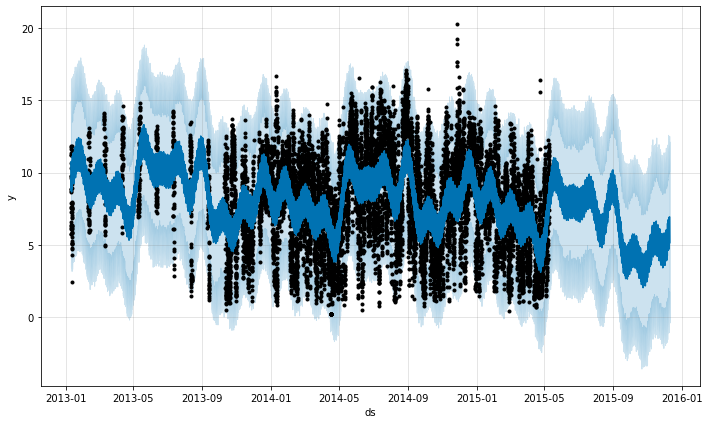

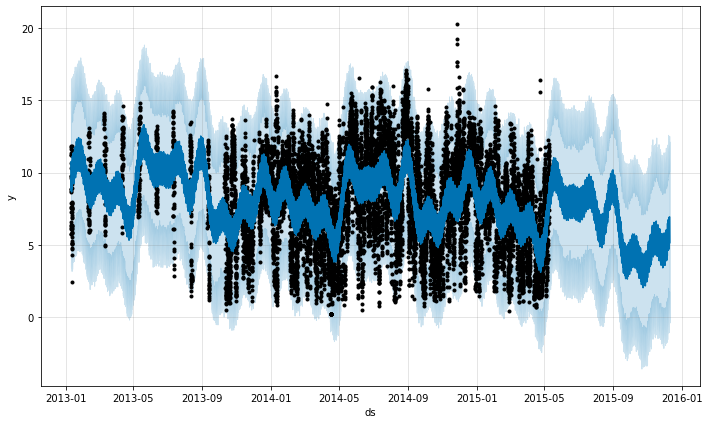

In [106]:
m.plot(forecast)

<AxesSubplot:xlabel='ds'>

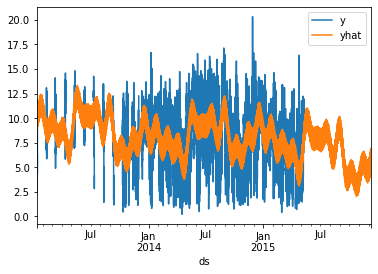

In [107]:
pd.concat([train.set_index('ds')['y'], forecast.set_index('ds')['yhat']],axis=1).plot()

In [3]:
from sklearn.metrics import mean_squared_error
error_missingData =  mean_squared_error(dataset['y'], forecast['yhat'])

print("RMSE with missing data", error_missingData)

NameError: name 'dataset' is not defined

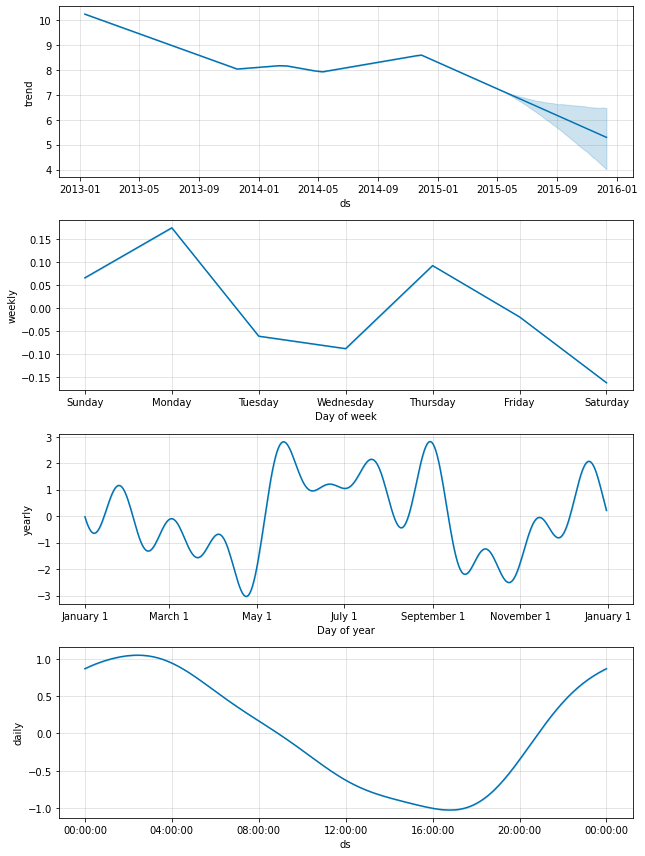

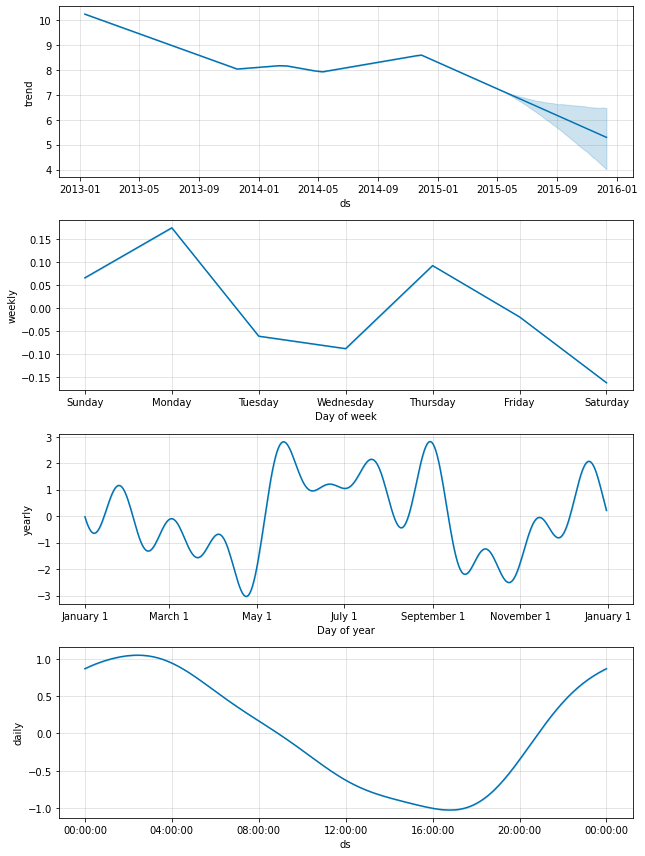

In [108]:
m.plot_components(forecast)

[[<matplotlib.lines.Line2D at 0x26f1d816188>],

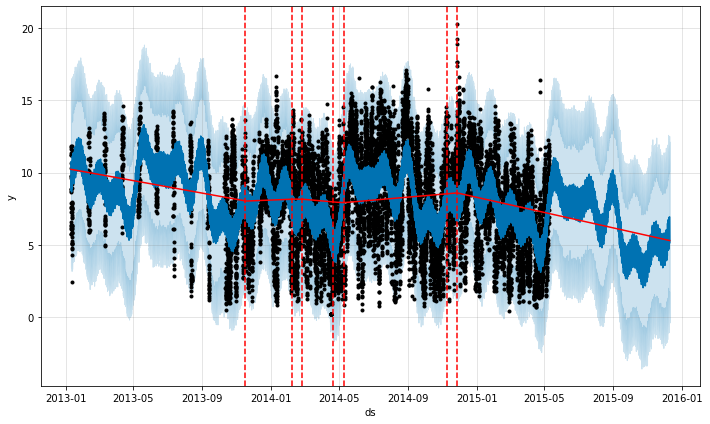

In [109]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
add_changepoints_to_plot(fig.gca(), m, forecast)

In [110]:
m.changepoints

440     2013-07-10 18:00:00
881     2013-10-20 03:00:00
1321    2013-11-16 11:00:00
1762    2013-12-13 20:00:00
2202    2014-01-01 04:00:00
2643    2014-01-19 13:00:00
3083    2014-02-06 21:00:00
3524    2014-02-25 06:00:00
3964    2014-03-15 14:00:00
4404    2014-04-02 22:00:00
4845    2014-04-21 07:00:00
5285    2014-05-09 15:00:00
5726    2014-05-28 00:00:00
6166    2014-06-15 08:00:00
6607    2014-07-03 17:00:00
7047    2014-07-22 01:00:00
7487    2014-08-09 09:00:00
7928    2014-08-27 18:00:00
8368    2014-09-15 02:00:00
8809    2014-10-03 11:00:00
9249    2014-10-21 19:00:00
9690    2014-11-09 04:00:00
10130   2014-11-27 12:00:00
10571   2014-12-15 21:00:00
11011   2015-01-03 05:00:00
Name: ds, dtype: datetime64[ns]

In [111]:
import plotly.graph_objs as go

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as ply

fig = plot_plotly(m, forecast)  #this returns a plotly figure
ply.iplot(fig)

In [112]:
from fbprophet.diagnostics import cross_validation as cv
results = cv(model=m, initial = '365', horizon = '14days')
results.head()

INFO:fbprophet:Making 91 forecasts with cutoffs between 2013-01-29 23:00:00 and 2015-04-25 23:00:00
C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecat

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Afrid\Anaconda3

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-02-10 00:00:00,108.636236,106.340970,110.949627,8.951667,2013-01-29 23:00:00
1,2013-02-10 01:00:00,108.241950,106.079254,110.496090,9.430000,2013-01-29 23:00:00
2,2013-02-10 02:00:00,107.313411,105.112629,109.595456,8.443333,2013-01-29 23:00:00
3,2013-02-10 03:00:00,106.145621,103.855810,108.338424,7.720000,2013-01-29 23:00:00
4,2013-02-10 04:00:00,105.138661,102.881448,107.534842,7.565000,2013-01-29 23:00:00


In [113]:
from fbprophet.diagnostics import performance_metrics as pm

pm(results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 11:00:00,59.665637,7.724354,3.176757,0.540963,0.231720,0.872740
1,1 days 12:00:00,60.296994,7.765114,3.189261,0.540370,0.233102,0.873139
2,1 days 13:00:00,60.957621,7.807536,3.201409,0.541661,0.236147,0.872779
3,1 days 14:00:00,61.649468,7.851718,3.215738,0.544449,0.237458,0.871994
4,1 days 15:00:00,62.380669,7.898143,3.232641,0.548104,0.239459,0.871279
...,...,...,...,...,...,...,...
297,13 days 20:00:00,786.077638,28.037076,10.468230,1.795596,0.441192,0.645692
298,13 days 21:00:00,793.848705,28.175321,10.504566,1.812476,0.436174,0.643368
299,13 days 22:00:00,800.404386,28.291419,10.536267,1.828403,0.436174,0.642161
300,13 days 23:00:00,806.110168,28.392079,10.562499,1.835409,0.430064,0.640979
